<table style="width: 100%;" id="nb-header">
    <tr style="background-color: transparent;"><td>
        <img src="https://d8a-88.github.io/econ-fa19/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 12pt;"><strong>Economic Models</strong>, Fall 2019<br>
            Dr. Eric Van Dusen</p></td></tr>
</table>

# Project 1: Modeling Macroeconomic Variables using the Cobb-Douglas Production Function

### Acknowledgements: ##
We would like to thank Professor Raymond Hawkins for his Economics 100B Problem Set that served as the basis for this assignment.

### Due Dates and Important Information:

- This project is in three parts. To get full credit for the checkpoint, you must pass all public autograder tests and write at least one word for the first two parts of the project. The checkpoint is due on Monday, October 21, 2019 at 11:59pm.
- The whole project (all three parts) will be due 2 Mondays from now, on October 28, 2019 at 11:59pm. You are allowed to amend parts 1 and 2 in this submission as well.
- **Do not change any of the given variable or function names as this would cause autograder problems. Make sure to name your columns and tables exactly as the questions ask you to.**

---

The goal of this project is to gain experience completing the following key steps in the data science pipeline:

1. Downloading and converting raw data files into a format Python can interact with
2. Identifying and visualizing overall trends in the data using a process called Exploratory Data Analysis (EDA)
3. Using the data to complete a problem of prediction

We hope that at the end of this project, you will see how the skills you have learned in Data 8 and this class can prepare you for dealing with real world datasets, and how you can use them to answer questions about the economy or the world.

**The question you will be answering today is the following:**

> How can we apply the Cobb-Douglas Production Function to understand the different ways countries produce output or GDP?

## Question 1: Retrieving the data and simplifying the problem

In almost all cases in industry, you will have to find the dataset that can answer the question you are trying to solve. However, as we are introducing you to this process, we will be providing the link to such a dataset.

We will be using "Penn World Table" (PWT), a dataset that catalogues information on relative levels of income, output, inputs and productivity for 182 countries between 1950 and 2017. It was compiled by the University of Groningen.

Your task:
1. Go to: https://www.rug.nl/ggdc/productivity/pwt/ and download the Excel datafile.
2. Open the Excel file, select the "Data" sheet, then File > Save As > Select. Type in a file name and **change the file format to Comma Separated Values (.csv)**.
3. Upload this .csv file to the same folder as this Notebook. You can access the Datahub file explorer by clicking the Jupyter logo on the top-left of the notebook and navigating to econ-fa19 > wk07. Uploading is accomplished by dragging and dropping the file into the file explorer window and clicking the blue button labeled "upload".
4. Edit the line ```file_name``` such that it matches the name of the .csv file that you just uploaded.
5. Run the code cell below.

In [1]:
from utils import *
import pandas as pd
from datascience import *
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.linear_model import LinearRegression
import otter
grader = otter.Notebook()
%matplotlib inline
plt.style.use("seaborn-muted")

In [2]:
file_name = "pwt91_data.csv"

### Do not change the line below ###
data = to_table(file_name)

In [3]:
grader.check("q1_0")

If you pass the autograder check above, then you have correctly read in the data file. Nice! You have converted an online dataset into a table that you can explore and manipulate in Python! Now, this dataset is saved under the table called ```data```. Look at the first 5 lines below:

In [4]:
data.show(15)

countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,cgdpo,cn,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,i_irr,cor_exp,statcap,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
ABW,Aruba,Aruban Guilder,1950,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1951,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1952,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1953,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1954,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1955,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1956,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1957,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1958,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1959,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


Notice that there are a lot of ```-1``` values. This is representative of data that is unavailable for that variable, for a given country-year.

To get an idea of the dataset's geographic scope, let us find out what countries are included, and if they are spelt in interesting ways. This will be helpful for us later on in our analysis.

**Question 1.1:**
Create a two-column table called <code>all_countries</code>. Its first column will be called <code>Country</code> and the second <code>Earliest Year</code>. It should contain all of the countries that appear in the <code>data</code> table sorted in alphabetical order with the earliest year they appear in the dataset where the <code>cgdpe</code> column is not <code>-1</code>. Assign that table to the variable <code>all_countries</code> and display its first 10 rows.

In [3]:
data = to_table(file_name)
data

countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,cgdpo,cn,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,i_irr,cor_exp,statcap,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
ABW,Aruba,Aruban Guilder,1950,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1951,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1952,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1953,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1954,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1955,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1956,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1957,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1958,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1959,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [4]:
sorted_data = data.where(data.column('cgdpe') > -1).select("country", "year").relabeled("year", "Earliest Year")
alphabetical_order = sorted_data.sort('country')
#alphabetical_order.sort('country').drop_duplicates(subset = 'country', keep='first')
#I want to write a function that will return the minimum year in "earliest year" for each country.

alphabetical_order.show()


country,Earliest Year
Albania,1970
Albania,1971
Albania,1972
Albania,1973
Albania,1974
Albania,1975
Albania,1976
Albania,1977
Albania,1978
Albania,1979


In [5]:
column_count = alphabetical_order.group('country').column('count')
column_count

array([48, 58, 48, 48, 48, 68, 28, 48, 68, 68, 28, 48, 48, 59, 58, 28, 68,
       48, 59, 48, 48, 68, 28, 58, 68, 48, 48, 48, 59, 58, 58, 48, 58, 68,
       48, 58, 58, 67, 66, 58, 48, 68, 58, 58, 68, 28, 13, 68, 28, 58, 68,
       68, 48, 48, 67, 68, 68, 68, 58, 28, 48, 68, 58, 68, 68, 58, 58, 28,
       68, 63, 67, 48, 68, 59, 58, 58, 68, 48, 68, 68, 58, 63, 48, 68, 68,
       68, 65, 68, 64, 28, 68, 48, 28, 48, 28, 48, 58, 54, 28, 68, 58, 64,
       63, 48, 58, 64, 58, 68, 68, 48, 28, 48, 68, 58, 56, 58, 58, 68, 68,
       68, 58, 68, 28, 68, 48, 68, 68, 67, 68, 68, 48, 68, 48, 65, 28, 58,
       28, 58, 48, 48, 48, 48, 58, 28, 58, 57, 58, 13, 28, 28, 68, 68, 68,
       48, 48, 48, 48, 68, 68, 58, 67, 28, 68, 58, 68, 58, 68, 28, 48, 58,
       68, 28, 48, 68, 68, 68, 28, 68, 48, 29, 63, 64])

In [6]:
start_index = make_array(0)
iterator = 0
for i in column_count:
    
    start_index = np.append(start_index, start_index[iterator] + i)
    iterator = iterator + 1

print(start_index)
#DO NOT CHANGE


[   0   48  106  154  202  250  318  346  394  462  530  558  606  654
  713  771  799  867  915  974 1022 1070 1138 1166 1224 1292 1340 1388
 1436 1495 1553 1611 1659 1717 1785 1833 1891 1949 2016 2082 2140 2188
 2256 2314 2372 2440 2468 2481 2549 2577 2635 2703 2771 2819 2867 2934
 3002 3070 3138 3196 3224 3272 3340 3398 3466 3534 3592 3650 3678 3746
 3809 3876 3924 3992 4051 4109 4167 4235 4283 4351 4419 4477 4540 4588
 4656 4724 4792 4857 4925 4989 5017 5085 5133 5161 5209 5237 5285 5343
 5397 5425 5493 5551 5615 5678 5726 5784 5848 5906 5974 6042 6090 6118
 6166 6234 6292 6348 6406 6464 6532 6600 6668 6726 6794 6822 6890 6938
 7006 7074 7141 7209 7277 7325 7393 7441 7506 7534 7592 7620 7678 7726
 7774 7822 7870 7928 7956 8014 8071 8129 8142 8170 8198 8266 8334 8402
 8450 8498 8546 8594 8662 8730 8788 8855 8883 8951 9009 9077 9135 9203
 9231 9279 9337 9405 9433 9481 9549 9617 9685 9713 9781 9829 9858 9921
 9985]


In [7]:
length = len(start_index)
second_length = start_index[0:length-1]
all_countries = alphabetical_order.take(second_length).sort('country').relabeled('country', 'Country')
all_countries.show(10)

Country,Earliest Year
Albania,1970
Algeria,1960
Angola,1970
Anguilla,1970
Antigua and Barbuda,1970
Argentina,1950
Armenia,1990
Aruba,1970
Australia,1950
Austria,1950


In [9]:
grader.check("q1_1")

Take a look at ```data``` again. Notice that it has a lot of columns. We won't need most of them. As we will be using the Cobb-Douglas Production Function, think about what variables are needed in the equation, and which ones are already present in the table. This is an important part of the data science process: understanding the dataset that you are using. Most real-world datasets provide documentation listing the definitions and equations behind each variable. 

PWT provides this and has identified three variables that will be helpful to us:
1. cn $\Rightarrow$ Capital Stock in millions of USD
2. cgdpe $\Rightarrow$ Expenditure-side Real GDP in millions of USD
3. emp $\Rightarrow$ Number of Persons employed in millions

**An important note: for the sake of simplicity, we will be assuming that nations exhibit constant returns to scale.**

**Question 1.2(a):**
In the text cell below do the following:
1. Rewrite the original Cobb-Douglas function in LaTeX, under the assumption that are no constant returns to scale. On a separate line, write the restriction implied by constant returns to scale. <br />
2. Give a brief explanation of what each variable in the Cobb-Douglas function quantifies (i.e. K measures the amount of ...)

1. $Y = AK^\alpha L^\beta $

    If returns to scale are constant, then $Y = AK^\alpha L^{1-\alpha}$

2. A = total factor productivity; can be thought of as technology/R & D
   K = capital input; a measure of machinery, equipment, buildings, value of capital input/price of capital
   L = labor input; total number of hours workers put into production
   alpha & beta = output elasticities of capital and labor, determined by technology


In [130]:
data.show(3)

countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,cgdpo,cn,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,i_irr,cor_exp,statcap,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
ABW,Aruba,Aruban Guilder,1950,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1951,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1952,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


**Question 1.2(b):**
Assign the variable <code>missing_variables</code> to an array containing the Cobb-Douglas function variables that are missing from the dataset.

In [135]:
# cn = capital stock in millions 
#cgdpe = expenditure side real GDP in millions
# emp = amount of people employed in millions
missing_variables = make_array('tfp', 'alpha', 'beta')

In [136]:
grader.check("q1_2b")

**Question 1.3:**
Remove all columns from <code>data</code> except for <code>cn</code>, <code>cgdpe</code>, <code>emp</code>, <code>country</code> and <code>year</code>. Ensure that <code>country</code> and <code>year</code> are the two left-most columns respectively. Call the new table <code>cleaned_data</code> and display its first five rows. Rename the <code>cn</code> column to <code>Capital Stock</code>, <code>cgdpe</code> to <code>Real GDP</code> and <code>emp</code> to <code>Labor Force</code>.
</div>

In [8]:
clean = data.select('country', 'year','cn', 'cgdpe', 'emp')
cleaned_data = clean.relabeled('cn', 'Capital Stock').relabeled('cgdpe', 'Real GDP').relabeled('emp', 'Labor Force')
cleaned_data

country,year,Capital Stock,Real GDP,Labor Force
Aruba,1950,-1,-1,-1
Aruba,1951,-1,-1,-1
Aruba,1952,-1,-1,-1
Aruba,1953,-1,-1,-1
Aruba,1954,-1,-1,-1
Aruba,1955,-1,-1,-1
Aruba,1956,-1,-1,-1
Aruba,1957,-1,-1,-1
Aruba,1958,-1,-1,-1
Aruba,1959,-1,-1,-1


In [150]:
grader.check("q1_3")

Our goal will be to predict what $\alpha$ and $A$ are for each of the countries that we will be examining. From these, we will be able to explore how output is produced in each of these countries. The question is, how can we use the Cobb-Douglas Production function to solve for the missing variables? An easy way would be to take the natural log of the equation, making it linear, providing us with ways to quantify $\alpha$ and $A$.

**Question 1.4:**
In the cell below, using LaTeX, take the natural log of the Cobb-Douglas Production Function and rewrite it as a function of one variable. Show all of your work. Full credit will not be given if you just display the final simplified equation without showing any work. <br />
<i> Hint: $\ln (Y) - \ln (L) = \text{...}$ </i>

$Y = AK^\alpha L^{1-\alpha} $

$ln(Y) = ln(A) + \alpha ln(K) + (1-\alpha) ln(L)$

$\ln(Y) = \ln(A) + \alpha \ln(K) + \ln(L) - \alpha \ln(L)$

$\ln(Y)- \ln(L) = \ln(A) + \alpha \left ( \ln(K) - \ln(L) \right )$

$\ln \left ( \dfrac{Y}{L} \right ) = \ln(A) + \alpha \ln \left ( \dfrac{K}{L} \right )$





## Question 2: Exploring the Data

Whenever we are dealing with a large dataset like PWT, it is a good idea to see how the variables interact with each other. A common method, especially when dealing with economic data, is to generate a time series. This is a plot of some economic variable on the y-axis and time on the x-axis. We are going to do just that for our important Cobb-Douglas variables for different countries.

**Question 2.1:**
Create a table of GDP, Capital Stock and Labor for the USA from 1990 to 2017. Do the same for China and two other countries of your choice. Use the middle cell to check if your countries of choice exist in the dataset. Make sure to use the country name exactly as it appears in the data table. Place all of this data in one table called <code>comparison_data</code>. Display the first 10 rows of <code>comparison_data</code>. Additionally, set the <code>country_array</code> variable to an array of the countries you selected in alphabetical order. <br />
<i>Hint: Look at the <a href="https://d8a-88.github.io/econ-fa19/python-reference.html"> Python Reference</a> for a table function you can use.</i>

In [193]:
### Run this cell to see a table of all the countries in the dataset.###
### Select two countries and proceed to the lower code cell. ###
all_countries

Country,Earliest Year
Albania,1970
Algeria,1960
Angola,1970
Anguilla,1970
Antigua and Barbuda,1970
Argentina,1950
Armenia,1990
Aruba,1970
Australia,1950
Austria,1950


In [9]:
# country_array should be in alphabetical order
country_array = make_array("China", "Colombia", "Ghana", "United States")
country_table = Table().with_column('country', country_array)

comparison_data = cleaned_data.join('country', country_table)
comparison_data

country,year,Capital Stock,Real GDP,Labor Force
China,1950,-1,-1,-1
China,1951,-1,-1,-1
China,1952,335618,616680,238.959
China,1953,351051,698143,244.867
China,1954,368822,642718,250.614
China,1955,390271,711235,256.24
China,1956,427058,748155,263.83
China,1957,453914,769214,272.241
China,1958,490739,755778,292.517
China,1959,560070,694574,304.347


In [12]:
grader.check("q2_1")

**Note:** If you ever need to refer to a list of the countries you selected in your code, do **not** use ```country_array```. When you place the data in ```comparison_data```, Python will automatically re-order the countries. Using ```country_array``` will cause a mis-match between your rows of data in ```comparison_data``` and the country it is actually from.

**Question 2.2:**
To help us in later questions, fill in the blanks in the <code>country_table_plotter</code> function below. Its inputs will be a table of the form <code>comparison_data</code> and the names of the two columns plotted, <code>columnX</code> and <code>columnY</code>. The <code>country_table_plotter</code> function will plot <code>columnX</code> versus <code>columnY</code> using data from <code>data_table</code> for all the countries contained in <code>data_table</code>. <br />
<i> Hint: Look at the <a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html"> Matplotlib Plotting Reference</a> for ideas of what to place in the blanks. </i>

In [351]:
def country_table_plotter(data_table, columnX, columnY):
    
    ### Your code here ###
    for row in data_table:
        plt.plot(data_table.where('country', country).column(columnX), data_table.column(columnY), label = country, linewidth = 1)
        
print(row.country)
    ### Do not change the code below ###
    #plt.legend()
    #plt.xlabel(columnX)
    #plt.ylabel(f"{columnY} (Logarithmic Scale)")
    #plt.yscale("log")
    

NameError: name 'row' is not defined

**Question 2.3:**
Produce a plot of time and capital stock for the countries in your table. In the text cell below your plot, identify differences between the countries and discuss what surprised you.

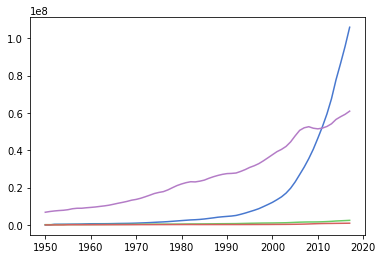

In [350]:
#country_table_plotter(comparison_data, 'Capital Stock', 'year')

plt.plot(comparison_data.where('country', 'China').column('year'), comparison_data.where('country', 'China').column('Capital Stock'))
plt.plot(comparison_data.where('country', 'Colombia').column('year'), comparison_data.where('country', 'Colombia').column('Capital Stock'))
plt.plot(comparison_data.where('country', 'Ghana').column('year'), comparison_data.where('country', 'Ghana').column('Capital Stock'))
plt.plot(comparison_data.where('country', 'United States').column('year'), comparison_data.where('country', 'United States').column('Capital Stock'))

- United States: United States (purple) growth is not quite as fast as China's but it is still growing at a faster rate than Ghana or Colombia.

- China: China's (blue) growth in its capital stock appears to be exponential; it is growing at a much faster rate than any other country. This could be due to the fact that China imports a lot of technology from the US.

- Your Country: Colombia (green) has a stagnant capital stock growth rate. Colombia has been struggling with a government that is not entirely transparent, which may be a source of stagnant growth.

- Your Country: Ghana (red) also has a stagnant capital stock growth rate. Problems with stagnant capital stock growth rate could be due to lack of wealth, access to technology, or high rates of inequality.

**Question 2.4:**
Produce a similar plot, but this time of time and labor for the countries in your table. In the text cell below your plot, identify differences between the countries and discuss what surprised you.

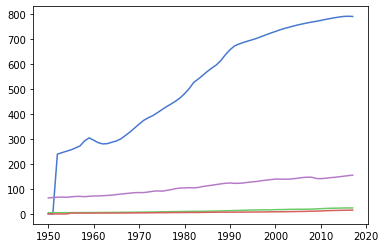

In [345]:
plt.plot(comparison_data.where('country', 'China').column('year'), comparison_data.where('country', 'China').column('Labor Force'))
#China = blue

plt.plot(comparison_data.where('country', 'Colombia').column('year'), comparison_data.where('country', 'Colombia').column('Labor Force'))
#Colombia = green

plt.plot(comparison_data.where('country', 'Ghana').column('year'), comparison_data.where('country', 'Ghana').column('Labor Force'))
#Ghana = red

plt.plot(comparison_data.where('country', 'United States').column('year'), comparison_data.where('country', 'United States').column('Labor Force'))
#US = purple


- United States: The United States labor force has remained relatively steady from 1990-2017. It has been creeping up a little bit but not as much as China. This could be due to lower incomes for millenials and lower birth rates (children are expensive). 

- China: China's (blue) labor force has grown again at an incredibly high rate in comparison to other countries. It is far above the United State's, Ghana's and Colombia's, though it does appear to be slowing down, possibly due to men and women in China marrying later and having fewer children.

- Your Country: Colombia's labor force has remained extremely low compared to the US and China. This could be due to lack of resources and war.

- Your Country: Ghana labor force has remained extremely low compared to the US and China. This could be due to lack of resources, weak exports, and poor macroeconomic policies.

**Question 2.5:**
Create a plot of time and GDP for the countries in your table. In the text cell below your plot, using your knowledge of the Cobb-Douglas Production Function, identify differences between the countries and discuss these in relation to your findings about each of the country's levels of capital stock and labor. Also note about how these have changed over time, if at all.

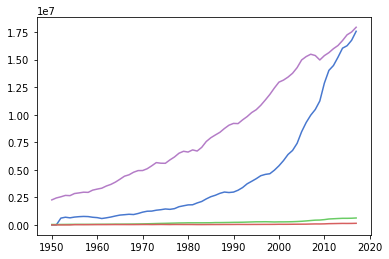

In [323]:
plt.plot(comparison_data.where('country', 'China').column('year'), comparison_data.where('country', 'China').column('Real GDP'))
plt.plot(comparison_data.where('country', 'Colombia').column('year'), comparison_data.where('country', 'Colombia').column('Real GDP'))
plt.plot(comparison_data.where('country', 'Ghana').column('year'), comparison_data.where('country', 'Ghana').column('Real GDP'))
plt.plot(comparison_data.where('country', 'United States').column('year'), comparison_data.where('country', 'United States').column('Real GDP'))


- United States: The US's real GDP has been consistently higher than China's, though the data show China is catching up to the US. The US is also heavily debt-riddled as the deficit remains at about approximately $21 trillion.

- China: China's real GDP is catching up to the US, almost matching it in recent years. This could be due to new innovation/technology/higher education especially among women.

- Your Country: Colombia's real GDP is slightly higher than Ghana's, in recent years. However, trends suggest that real GDP will remain somewhat low.

- Your Country: Ghana's real GDP remains relatively low in comparison to other countries and does not appear to be increasing any time soon. 

### Checkpoint: Complete Questions 1 and 2 by Monday, October 21 at 11:59pm.

To turn in this project, go to File > Download As, select Notebook and upload this .ipynb file to Gradescope under Project 1 Checkpoint - Notebook.

---

## Question 3: Prediction and Comparison

We are now going to provide numerical backing to your discussions of differences between the nations. We will predict values for $\alpha$ and $A$ for each of the 4 countries that we are examining. To do this, we will revisit the equation that you derived in question 1.4. 

**Question 3.1:**
A key step in the original paper by Cobb and Douglas was that they converted the data into an index. This is important because the data is measured in different units. Do this for each country and each of the variables in <code>comparison_data</code>. Let the 2011 value for each variable in each country be the base year, i.e. 100. Place this in a new table called <code>indexed_data</code> together with <code>country</code> and <code>year</code> columns. Display the first few rows.

Hint: The formula for calculating an index is as follows: $$\frac{Q_\text{current year}}{Q_\text{base year}} \cdot 100, \text{ for some variable } Q$$

In [10]:
eleven = comparison_data.where('year', 2011).where('country', 'China').column('Capital Stock').item(0)
ninety = comparison_data.where('year', 1990).where('country', 'China').column('Capital Stock').item(0)
ninety/eleven * 100

# Example -- China's 1990 value given a 2011 base year.

8.67161267083845

In [10]:
#comparison_data.where('year', 2011).

from_90_to_17 = comparison_data.where('year', are.between_or_equal_to(1990, 2017))
eleven = comparison_data.where('year', 2011)
seventeen_and_11 = from_90_to_17.join('country', eleven)

indexed_data = Table().with_columns("country", seventeen_and_11.column('country'),
                                    "year", seventeen_and_11.column('year'),
                                    "Indexed K", seventeen_and_11.column('Capital Stock')/seventeen_and_11.column('Capital Stock_2') * 100,
                                    "Indexed L", seventeen_and_11.column('Labor Force')/seventeen_and_11.column('Labor Force_2') * 100,
                                    "Indexed Y", seventeen_and_11.column('Real GDP')/seventeen_and_11.column('Real GDP_2') * 100
                                   )
indexed_data.show()

country,year,Indexed K,Indexed L,Indexed Y
China,1990,8.67161,84.4034,21.2439
China,1991,9.05109,86.3807,22.4446
China,1992,9.65506,87.3824,24.1699
China,1993,10.7832,88.2054,26.5915
China,1994,12.0524,88.9376,28.2215
China,1995,13.495,89.6196,29.9083
China,1996,14.9247,90.3957,31.8366
China,1997,16.5313,91.2963,32.6932
China,1998,18.6067,92.1745,33.13
China,1999,20.7544,93.0289,35.416


In [ ]:
base_values = comparison_data.where('year', 2011)
countries = 
indexed_Ks = make_array()
indexed_Ls = make_array()
indexed_Ys = make_array()

for country in countries:
    current_year = comparison_data.where('year', ...)
    base_year = comparison_data.where('year', 2011)
    return current_year/base_year * 100
    
#indexed_data = Table().with_columns("country", comparison_data.where('year', 2011).column('country')),
                                    "year", comparison_data.where('year', 2011).column('year'),
                                    "Indexed K", ...,
                                    "Indexed L", ...,
                                    "Indexed Y", ...
                                     )

indexed_data.show(5)

# find the indexed values from 1990 to 2017 using 2011 value as the base year.

In [56]:
grader.check("q3_1")

**Question 3.2(a):**
Using the equation you derived in part 1 and the <code>indexed_data</code> table, calculate the two log ratios that you need to perform linear regression. Place them in the table <code>log_ratios</code> with <code>country</code> and <code>year</code> as the two leftmost columns respectively. Display the first 10 rows and name the columns appropriately. The <code>log_ratios</code> table should have 4 columns.
</div>

In [11]:
draft = indexed_data.with_columns(
            "ln(K/L)", np.log(indexed_data.column('Indexed K')/indexed_data.column('Indexed L')),
            "ln(Y/L)", np.log(indexed_data.column('Indexed Y')/indexed_data.column('Indexed L'))
            )
log_ratios = draft.drop('Indexed K').drop('Indexed L').drop('Indexed Y')
log_ratios.show()

country,year,ln(K/L),ln(Y/L)
China,1990,-2.27555,-1.37954
China,1991,-2.25588,-1.34772
China,1992,-2.20281,-1.28518
China,1993,-2.10168,-1.19908
China,1994,-1.99867,-1.14785
China,1995,-1.89325,-1.09744
China,1996,-1.80118,-1.04358
China,1997,-1.70885,-1.02694
China,1998,-1.60016,-1.02324
China,1999,-1.50015,-0.965746


In [15]:
grader.check("q3_2a")

**Question 3.2(b):**
Using the <code>country_table_scatter</code> function, plot the log ratios for each country from the <code>log_ratios</code> table below.
</div>

In [12]:
### DO NOT EDIT THE CODE IN THIS CELL, just run it! ###

def country_table_scatter(data_table, columnX, columnY):
    # First getting a list of all the countries in data_table
    country_list = data_table.group("country").column("country")
    
    # For each country, creating a plot of columnX vs. columnY
    for country in country_list:
        curr_data_table = data_table.where("country", country)
        curr_data_table.scatter(columnX, columnY)
        plt.title(country)

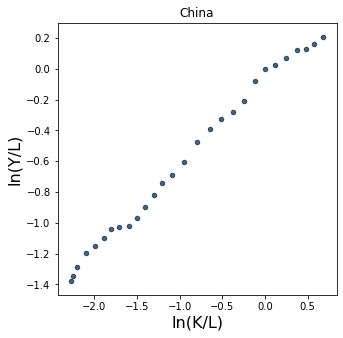

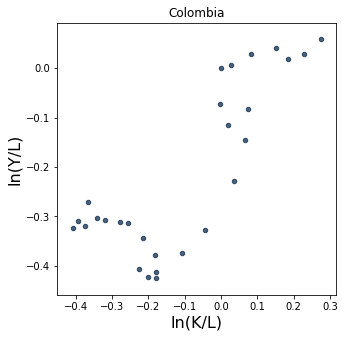

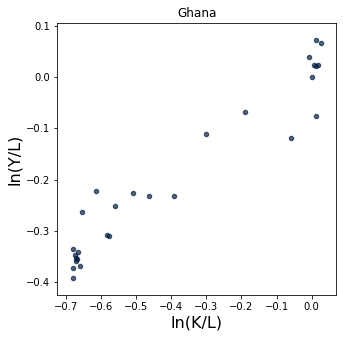

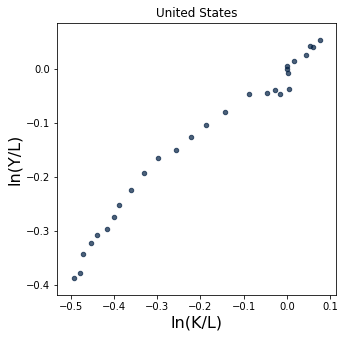

In [13]:
country_table_scatter(log_ratios, 'ln(K/L)', 'ln(Y/L)')

### Extra Credit 1

What do you notice about the scatter plot for the US? What could be a possible reason for this?

The scatter plot for China and the United States are both much more linear than Colombia and Ghana. The US's scatter plot is a little spottier than China's as values of ln(K/L) increase. That means when the US's ln(K/L) values increase and hits approximately 0, its output (ln Y/L) is not exactly proportionate and thus does not provide a linear pattern, unlike China's. But that's only for a small part of the US's scatter plot. Nonetheless, it is still important.

The code below shows the US's log ratios (2006-2011) that are not quite linear. In 2008, the US economy experienced a great housing recession. Effects of the recession were felt through 2009 and 2010. Homeowners with questionable credit were allowed to take out large loans and invest (which could explain the higher K/L ratio) in capital, but output (Y/L) was at a stand-still. Many banks needed to be bailed out by the Federal Reserve since homeowners could not pay off their loans, and at a point of such uncertainty, consumers' expectations were volatile (but mostly anticipating a crash). Since the Dow Jones is reflective of consumer expecations, its crash on Sept 29, 2008 tells us that consumers did not want to spend (income = expenditure; Y = C + I + G + NX) and instead, save their money because of the crisis. To stimulate the economy, the government had to step in.

In 2009, congress introduced the American Reinvestment and Recovery Act, a $787 billion stimulus plan and a huge investment in the economy. This could explain the jump in ln(Y/L) ratios from 2009 to 2010 (from 2006-2009, the ratio was lingering around -0.04 and -0.03). From then on the scatter plot appears to become more linear again.

In [20]:
log_ratios.where('country', 'United States').where('year', are.between(2006,2013))

country,year,ln(K/L),ln(Y/L)
United States,2006,-0.0452788,-0.0447132
United States,2007,-0.0271656,-0.0395772
United States,2008,-0.0146876,-0.0457512
United States,2009,0.00497123,-0.0371589
United States,2010,0.00217498,-0.00734156
United States,2011,0,0
United States,2012,-0.000450719,0.00575706


To help you compare, the code below will plot all of the scatter plots on the same axis. Remember, the axes are in terms of logarithms. Thus, even small differences in slope or intercept would yield big changes.

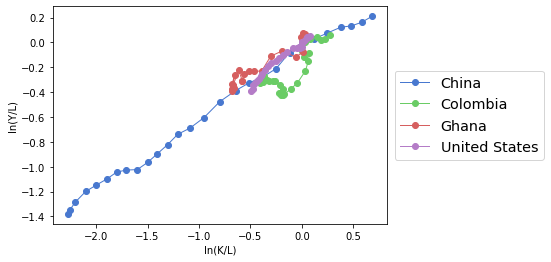

In [12]:
### Do not change the code below ###
all_scatter(log_ratios, "ln(K/L)", "ln(Y/L)")

Now, we want to make a linear approximation of the curves above. How will we do this? Through linear regression.

We will be using Scikit-Learn's (Sk-learn) linear regression function to get the $\alpha$ and $A$ values for each country. Here is the link to the documentation of the <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html"> function</a>: 

Let us break down how this function works by taking a look at the examples section of the documentation.
``` 
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
```
The ```LinearRegression()``` function creates a LinearRegression object that has many different functions that we will be using, mainly ```.fit()``` and attributes like ```.coef_``` and ```.intercept_```. The ```.fit(X, y)``` function fits a line using the ```X``` and ```y``` arrays passed into it.

```
reg.coef_
array([1., 2.])
reg.intercept_ 
3.0000...
reg.predict(np.array([[3, 5]]))
array([16.])
```

After we have fit a line to the data, we can then get the corresponding attributes that we need: the slope coefficient and intercept. Note: the above example uses the equation:

$$
y = ax_0 + bx_1 + c
$$

Its data is in 3 dimensions, $x_0$, $x_1$ and $y$. Thus, ```reg.coef_``` returns a two element array, as there are two slope coefficients for x_0 and x_1. ```reg.intercept_``` still returns the intercept of the fitted line.

Our data is in 2 dimensions, x and y. Thus, the function will attempt to fit the following line for each country:

$$
y = a + bx
$$

The function will find the values of $a$ and $b$ that minimize the squared errors at each value of $x$. You don't need to know the specifics of this just yet. Your task will be to figure out what arrays should be passed in as $y$ and $x$. Furthermore, think about the relationship between $\alpha$ and $A$ with regards to $a$ and $b$ from this linear regression fit.

**Question 3.3(a):**
Using Sklearn's Linear Regression function, fit the data taken from each country. Think about what should be passed into the <code>fit()</code> function. If you are confused about this, take a look at the sklearn <a href ="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit"> documentation</a> or the example above.        

</div>

In [13]:
### Create arrays of the data we will need from each country. ###
### Think about which variable should be on each axis. ##

# y = ax + b

china_x = log_ratios.where('country', 'China').column('ln(K/L)')
china_y = log_ratios.where('country', 'China').column('ln(Y/L)')
us_x = log_ratios.where('country', 'United States').column('ln(K/L)')
us_y = log_ratios.where('country', 'United States').column('ln(Y/L)')
country1_x = log_ratios.where('country', 'Colombia').column('ln(K/L)')
country1_y = log_ratios.where('country', 'Colombia').column('ln(Y/L)')
country2_x = log_ratios.where('country', 'Ghana').column('ln(K/L)')
country2_y = log_ratios.where('country', 'Ghana').column('ln(Y/L)')

### Do not change the code below ###

model_china = LinearRegression().fit(china_x.reshape(-1, 1), china_y.reshape(-1, 1))
model_us = LinearRegression().fit(us_x.reshape(-1, 1), us_y.reshape(-1, 1))
model_country1 = LinearRegression().fit(country1_x.reshape(-1, 1), country1_y.reshape(-1, 1))
model_country2 = LinearRegression().fit(country2_x.reshape(-1, 1), country2_y.reshape(-1, 1))

In [24]:
grader.check("q3_3a")

**Question 3.3(b):**
Now that we have fit the data of each country, we can then retrieve the slope and intercept of each fit. Using the equation you derived in question 1.3., fill in the blanks in the print statements below such that they display the $\alpha$ and $A$ values for each country. Note that you will need to transform at least one of the variables.


In [14]:
print(f"China alpha value: {model_china.coef_}")
print(f"United States alpha value: {model_us.coef_}")
print(f"Colombia alpha value: {model_country1.coef_}")
print(f"Ghana alpha value: {model_country2.coef_}")

China alpha value: [[0.54916526]]
United States alpha value: [[0.69166852]]
Colombia alpha value: [[0.67552061]]
Ghana alpha value: [[0.52166837]]


In [15]:
print(f"China A value: {np.e**model_china.intercept_}")
print(f"United States A value: {np.e**model_us.intercept_}")
print(f"Colombia A value: {np.e**model_country1.intercept_}")
print(f"Ghana A value: {np.e**model_country2.intercept_}")

China A value: [0.92126063]
United States A value: [0.9995846]
Colombia A value: [0.86580162]
Ghana A value: [1.00991487]


**Question 3.4:**
With reference to the $\alpha$ and $A$ values for each of the countries you have examined, do they indicate about that country's ability to produce output as measured through GDP? Compare and contrast how each country allocates capital and labor when producing output. How about the role of technology or research and development? 3-4 sentences should suffice.

The United States and Colombia have similar alpha values around 0.68.
China and Ghana have similar valyes of 0.53.
For a 1% increase in capital, US and Colombia's output increase by 0.68%, and China and Ghana's output increase by 0.53%.

The US and Ghana have A values of approximately 1.
China and Colombia have A values less than 1. 

I would guess since the US has relatively high values of alpha and A, it would have a high GDP. With the other countries, I expected China to have a higher alpha value, since China will have a high GDP. I expected Colombia to have a lower alpha, due to government corruption. I also expected Ghana to have a lower TFP factor, due to lack of resources. 

For the most part, it appears that GDP predictions through alpha and A are somewhat accurate.

### Extra Credit 2
A bonus point for each for the following: <br />
- If you select the country with the lowest $\alpha$ value among all the projects submitted. <br />
- If you select the country with the highest $A$ value among all the projects submitted. <br />


In [61]:
ninety_seventeen = cleaned_data.where('year', are.between_or_equal_to(1990, 2017))
second_eleven = cleaned_data.where('year', 2011)
both = ninety_seventeen.join('country', second_eleven)

all_indexed_countries = Table().with_columns(
    "country", ninety_seventeen.column('country'),
    "year", ninety_seventeen.column('year'),
    "Indexed K", both.column('Capital Stock')/both.column('Capital Stock_2') * 100,
    "Indexed L", both.column('Labor Force')/both.column('Labor Force_2') * 100,
    "Indexed Y", both.column('Real GDP')/both.column('Real GDP_2') * 100)

positive = all_indexed_countries.where('Indexed L', are.above(0))

log_ratios_2 = Table().with_columns(
    "country", positive.column('country'),
    "year", positive.column('year'),
    "ln(K/L)", np.log(positive.column(2)/positive.column(3)),
    "ln(Y/L)", np.log(positive.column(4)/positive.column(3)))

log_ratios_2.apply(model_country, 'country')

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log


country,year,ln(K/L),ln(Y/L)
Aruba,1990,-1.5428,-1.39434
Aruba,1991,-1.57497,-1.58703
Aruba,1992,-1.38699,-1.61503
Aruba,1993,-1.32566,-1.35385
Aruba,1994,-1.38624,-1.24223
Aruba,1995,-1.31817,-1.11333
Aruba,1996,-1.26311,-0.958841
Aruba,1997,-1.24017,-1.02458
Aruba,1998,-1.20058,-0.90565
Aruba,1999,-1.15878,-0.816779


# Congratulations! You've completed the project!

# Submission

To turn in this project, go to File > Download As, select Notebook and upload this .ipynb file to Gradescope under Project 1 Final Submission - Notebook. Then, run the cell below to generate a PDF of this assignment. It will save that file to the same folder that the notebook is in. Download that pdf and upload it to Gradescope under Project 1 Final Submission - PDF.

In [17]:
grader.export("proj01.ipynb")

LatexFailed: PDF creating failed, captured latex output:
Failed to run "['xelatex', './notebook.tex', '-quiet']" command:
This is XeTeX, Version 3.14159265-2.6-0.99998 (TeX Live 2017/Debian) (preloaded format=xelatex)
 restricted \write18 enabled.
entering extended mode
(./notebook.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 3 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size11.clo))
(/usr/share/texlive/texmf-dist/tex/latex/tcolorbox/tcolorbox.sty
(/usr/share/texlive/texmf-dist/tex/latex/pgf/basiclayer/pgf.sty
(/usr/share/texlive/texmf-dist/tex/latex/pgf/utilities/pgfrcs.sty
(/usr/share/texlive/texmf-dist/tex/generic/pgf/utilities/pgfutil-common.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/utilities/pgfutil-common-lists.t
ex)) (/usr/share/texlive/texmf-dist/tex/generic/pgf/utilities/pgfutil-latex.def
(/usr/share/texlive/texmf-dist/tex/latex/ms/everyshi.sty))
(/usr/share/texlive/texmf-dist/tex/generic/pgf/utilities/pgfrcs.code.tex))
(/usr/share/texlive/texmf-dist/tex/latex/pgf/basiclayer/pgfcore.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/graphicx.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/latex/graphics/graphics.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/trig.sty)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/graphics.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-def/xetex.def)))
(/usr/share/texlive/texmf-dist/tex/latex/pgf/systemlayer/pgfsys.sty
(/usr/share/texlive/texmf-dist/tex/generic/pgf/systemlayer/pgfsys.code.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/utilities/pgfkeys.code.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/utilities/pgfkeysfiltered.code.t
ex)) (/usr/share/texlive/texmf-dist/tex/generic/pgf/systemlayer/pgf.cfg)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/systemlayer/pgfsys-xetex.def
(/usr/share/texlive/texmf-dist/tex/generic/pgf/systemlayer/pgfsys-dvipdfmx.def
(/usr/share/texlive/texmf-dist/tex/generic/pgf/systemlayer/pgfsys-common-pdf.de
f))))
(/usr/share/texlive/texmf-dist/tex/generic/pgf/systemlayer/pgfsyssoftpath.code.
tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/systemlayer/pgfsysprotocol.code.
tex)) (/usr/share/texlive/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/color.cfg))
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcore.code.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmath.code.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathcalc.code.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathutil.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathparser.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.code.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.basic.code
.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.trigonomet
ric.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.random.cod
e.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.comparison
.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.base.code.
tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.round.code
.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.misc.code.
tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.integerari
thmetics.code.tex)))
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfloat.code.tex))
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorepoints.code.te
x)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorepathconstruct.
code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorepathusage.code
.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorescopes.code.te
x)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcoregraphicstate.c
ode.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcoretransformation
s.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorequick.code.tex
)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcoreobjects.code.t
ex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorepathprocessing
.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorearrows.code.te
x)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcoreshade.code.tex
)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcoreimage.code.tex

(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcoreexternal.code.
tex))
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorelayers.code.te
x)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcoretransparency.c
ode.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorepatterns.code.
tex)))
(/usr/share/texlive/texmf-dist/tex/generic/pgf/modules/pgfmoduleshapes.code.tex
) (/usr/share/texlive/texmf-dist/tex/generic/pgf/modules/pgfmoduleplot.code.tex
)
(/usr/share/texlive/texmf-dist/tex/latex/pgf/compatibility/pgfcomp-version-0-65
.sty)
(/usr/share/texlive/texmf-dist/tex/latex/pgf/compatibility/pgfcomp-version-1-18
.sty)) (/usr/share/texlive/texmf-dist/tex/latex/tools/verbatim.sty)
(/usr/share/texlive/texmf-dist/tex/latex/environ/environ.sty
(/usr/share/texlive/texmf-dist/tex/latex/trimspaces/trimspaces.sty))
(/usr/share/texlive/texmf-dist/tex/latex/etoolbox/etoolbox.sty)
(/usr/share/texlive/texmf-dist/tex/latex/tcolorbox/tcbbreakable.code.tex
Library (tcolorbox): 'tcbbreakable.code.tex' version '4.12'
)) (/usr/share/texlive/texmf-dist/tex/latex/parskip/parskip.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)
(/usr/share/texlive/texmf-dist/tex/latex/fontspec/fontspec.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3packages/xparse/xparse.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3kernel/expl3.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3kernel/expl3-code.tex)
(/usr/share/texlive/texmf-dist/tex/latex/l3kernel/l3xdvipdfmx.def)))
(/usr/share/texlive/texmf-dist/tex/latex/fontspec/fontspec-xetex.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/fontenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/tuenc.def))
(/usr/share/texlive/texmf-dist/tex/latex/fontspec/fontspec.cfg)))
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption.sty
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption3.sty))
(/usr/share/texlive/texmf-dist/tex/latex/adjustbox/adjustbox.sty
(/usr/share/texlive/texmf-dist/tex/latex/xkeyval/xkeyval.sty
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkeyval.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkvutils.tex)))
(/usr/share/texlive/texmf-dist/tex/latex/adjustbox/adjcalc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/adjustbox/trimclip.sty
(/usr/share/texlive/texmf-dist/tex/latex/collectbox/collectbox.sty)
(/usr/share/texlive/texmf-dist/tex/latex/adjustbox/tc-xetex.def))
(/usr/share/texlive/texmf-dist/tex/latex/ifoddpage/ifoddpage.sty)
(/usr/share/texlive/texmf-dist/tex/latex/varwidth/varwidth.sty))
(/usr/share/texlive/texmf-dist/tex/latex/float/float.sty)
(/usr/share/texlive/texmf-dist/tex/latex/tools/enumerate.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/upquote/upquote.sty)
(/usr/share/texlive/texmf-dist/tex/latex/eurosym/eurosym.sty)
(/usr/share/texlive/texmf-dist/tex/latex/ucs/ucs.sty
(/usr/share/texlive/texmf-dist/tex/latex/ucs/data/uni-global.def))
(/usr/share/texlive/texmf-dist/tex/latex/fancyvrb/fancyvrb.sty
Style option: `fancyvrb' v2.7a, with DG/SPQR fixes, and firstline=lastline fix 
<2008/02/07> (tvz))
(/usr/share/texlive/texmf-dist/tex/latex/oberdiek/grffile.sty
(/usr/share/texlive/texmf-dist/tex/latex/oberdiek/kvoptions.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ltxcmds.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/kvsetkeys.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/infwarerr.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/etexcmds.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifluatex.sty))))
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/pdftexcmds.sty))
(/usr/share/texlive/texmf-dist/tex/latex/hyperref/hyperref.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/hobsub-hyperref.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/hobsub-generic.sty))
(/usr/share/texlive/texmf-dist/tex/latex/oberdiek/auxhook.sty)
(/usr/share/texlive/texmf-dist/tex/latex/hyperref/pd1enc.def)
(/usr/share/texlive/texmf-dist/tex/latex/latexconfig/hyperref.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/url/url.sty))
(/usr/share/texlive/texmf-dist/tex/latex/hyperref/hxetex.def
(/usr/share/texlive/texmf-dist/tex/latex/hyperref/puenc.def)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/stringenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/oberdiek/rerunfilecheck.sty))
(/usr/share/texlive/texmf-dist/tex/latex/titling/titling.sty)
(/usr/share/texlive/texmf-dist/tex/latex/tools/longtable.sty)
(/usr/share/texlive/texmf-dist/tex/latex/booktabs/booktabs.sty)
(/usr/share/texlive/texmf-dist/tex/latex/enumitem/enumitem.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ulem/ulem.sty)
(/usr/share/texlive/texmf-dist/tex/latex/jknapltx/mathrsfs.sty)
No file notebook.aux.
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
ABD: EveryShipout initializing macros
(/usr/share/texlive/texmf-dist/tex/latex/caption/ltcaption.sty)
*geometry* driver: auto-detecting
*geometry* detected driver: xetex
*geometry* verbose mode - [ preamble ] result:
* driver: xetex
* paper: <default>
* layout: <same size as paper>
* layoutoffset:(h,v)=(0.0pt,0.0pt)
* modes: 
* h-part:(L,W,R)=(72.26999pt, 469.75502pt, 72.26999pt)
* v-part:(T,H,B)=(72.26999pt, 650.43001pt, 72.26999pt)
* \paperwidth=614.295pt
* \paperheight=794.96999pt
* \textwidth=469.75502pt
* \textheight=650.43001pt
* \oddsidemargin=0.0pt
* \evensidemargin=0.0pt
* \topmargin=-37.0pt
* \headheight=12.0pt
* \headsep=25.0pt
* \topskip=11.0pt
* \footskip=30.0pt
* \marginparwidth=59.0pt
* \marginparsep=10.0pt
* \columnsep=10.0pt
* \skip\footins=10.0pt plus 4.0pt minus 2.0pt
* \hoffset=0.0pt
* \voffset=0.0pt
* \mag=1000
* \@twocolumnfalse
* \@twosidefalse
* \@mparswitchfalse
* \@reversemarginfalse
* (1in=72.27pt=25.4mm, 1cm=28.453pt)

(/usr/share/texlive/texmf-dist/tex/latex/ucs/ucsencs.def)
(/usr/share/texlive/texmf-dist/tex/latex/hyperref/nameref.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/gettitlestring.sty))

Package hyperref Warning: Rerun to get /PageLabels entry.

(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/umsa.fd)
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/umsb.fd)
(/usr/share/texlive/texmf-dist/tex/latex/jknapltx/ursfs.fd)

LaTeX Warning: No \author given.


Overfull \hbox (208.59734pt too wide) in paragraph at lines 375--375
[]    \TU/lmtt/m/n/10.95 <img src="https://d8a-88.github.io/econ-fa19/assets/im
ages/blue_text.png" width="250px" style="margin-left: 0;" />[] 

Overfull \hbox (93.62236pt too wide) in paragraph at lines 377--377
[]    \TU/lmtt/m/n/10.95 <p style="text-align: right; font-size: 12pt;"><strong
>Economic Models</strong>, Fall 2019<br>[] 
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/se-ascii-print.def)

Package hyperref Warning: Difference (2) between bookmark levels is greater 
(hyperref)                than one, level fixed on input line 385.

[1] [2]
! Missing $ inserted.
<inserted text> 
                $
l.512   \$Y = AK\textsuperscript{\alpha L}
                                          \beta \$
? 
! Emergency stop.
<inserted text> 
                $
l.512   \$Y = AK\textsuperscript{\alpha L}
                                          \beta \$
Output written on notebook.pdf (2 pages).
Transcript written on notebook.log.
